# Game of Thrones Visualization

# Data Overview

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [150]:
df = pd.read_csv('/Users/katialopes-gilbert/repos/game-of-thrones/Game_of_Thrones.csv')

In [151]:
df.head()

,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,Running Time (Minutes),Directed by,Written by,Original Air Date,U.S. Viewers (Millions),Music by,Cinematography by,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Ordered,Filming Duration,Novel(s) Adapted,Synopsis
0,1,1,1,Winter Is Coming,61,Tim Van Patten,"David Benioff, D. B. Weiss",17-Apr-2011,2.22,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.9,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"North of the Seven Kingdoms of Westeros, Night..."
1,1,2,2,The Kingsroad,55,Tim Van Patten,"David Benioff, D. B. Weiss",24-Apr-2011,2.20,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.6,100,8.9,"March 2, 2010",Second half of 2010,A Game of Thrones,"Ned, the new Hand of the King, travels to King..."
2,1,3,3,Lord Snow,57,Brian Kirk,"David Benioff, D. B. Weiss",1-May-2011,2.44,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.5,81,8.7,"March 2, 2010",Second half of 2010,A Game of Thrones,Ned attends the King's Small Council and learn...
3,1,4,4,"Cripples, Bastards, and Broken Things",55,Brian Kirk,Bryan Cogman,8-May-2011,2.45,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.6,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"While returning to King's Landing, Tyrion stop..."
4,1,5,5,The Wolf and the Lion,54,Brian Kirk,"David Benioff, D. B. Weiss",15-May-2011,2.58,Ramin Djawadi,Marco Pontecorvo,Frances Parker,9.0,95,9.0,"March 2, 2010",Second half of 2010,A Game of Thrones,"King Robert's eunuch spy, Varys, has uncovered..."


In [152]:
df.shape

(73, 19)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Season                               73 non-null     int64  
 1   No. of Episode (Season)              73 non-null     int64  
 2   No. of Episode (Overall)             73 non-null     int64  
 3   Title of the Episode                 73 non-null     object 
 4   Running Time (Minutes)               73 non-null     int64  
 5   Directed by                          73 non-null     object 
 6   Written by                           73 non-null     object 
 7   Original Air Date                    73 non-null     object 
 8   U.S. Viewers (Millions)              73 non-null     float64
 9   Music by                             73 non-null     object 
 10  Cinematography by                    73 non-null     object 
 11  Editing by                        

In [154]:
df.isna().sum()

Season                                 0
No. of Episode (Season)                0
No. of Episode (Overall)               0
Title of the Episode                   0
Running Time (Minutes)                 0
Directed by                            0
Written by                             0
Original Air Date                      0
U.S. Viewers (Millions)                0
Music by                               0
Cinematography by                      0
Editing by                             0
IMDb Rating                            0
Rotten Tomatoes Rating (Percentage)    0
Metacritic Ratings                     0
Ordered                                0
Filming Duration                       0
Novel(s) Adapted                       0
Synopsis                               0
dtype: int64

# Data Cleaning

In [155]:
# convert Air Date to datetime object
df['Original Air Date'] = pd.to_datetime(df['Original Air Date'])

# create new columns for air month, day, and year
df['Air Month'] = df['Original Air Date'].dt.month
df['Air Day'] = df['Original Air Date'].dt.day
df['Air Year'] = df['Original Air Date'].dt.year

In [156]:
df.head()

,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,Running Time (Minutes),Directed by,Written by,Original Air Date,U.S. Viewers (Millions),Music by,Cinematography by,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Ordered,Filming Duration,Novel(s) Adapted,Synopsis,Air Month,Air Day,Air Year
0,1,1,1,Winter Is Coming,61,Tim Van Patten,"David Benioff, D. B. Weiss",2011-04-17,2.22,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.9,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"North of the Seven Kingdoms of Westeros, Night...",4,17,2011
1,1,2,2,The Kingsroad,55,Tim Van Patten,"David Benioff, D. B. Weiss",2011-04-24,2.20,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.6,100,8.9,"March 2, 2010",Second half of 2010,A Game of Thrones,"Ned, the new Hand of the King, travels to King...",4,24,2011
2,1,3,3,Lord Snow,57,Brian Kirk,"David Benioff, D. B. Weiss",2011-05-01,2.44,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.5,81,8.7,"March 2, 2010",Second half of 2010,A Game of Thrones,Ned attends the King's Small Council and learn...,5,1,2011
3,1,4,4,"Cripples, Bastards, and Broken Things",55,Brian Kirk,Bryan Cogman,2011-05-08,2.45,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.6,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"While returning to King's Landing, Tyrion stop...",5,8,2011
4,1,5,5,The Wolf and the Lion,54,Brian Kirk,"David Benioff, D. B. Weiss",2011-05-15,2.58,Ramin Djawadi,Marco Pontecorvo,Frances Parker,9.0,95,9.0,"March 2, 2010",Second half of 2010,A Game of Thrones,"King Robert's eunuch spy, Varys, has uncovered...",5,15,2011


In [157]:
df['Ordered'].value_counts()

Ordered
April 8, 2014     20
March 2, 2010     10
April 19, 2011    10
April 10, 2012    10
April 2, 2013     10
April 21, 2016     7
July 30, 2016      6
Name: count, dtype: int64

In [158]:
df.drop(columns='Ordered', inplace=True)

## Review Categorical Columns

In [159]:
df['Filming Duration'].value_counts()


Filming Duration
Second half of 2010            10
Second half of 2011            10
July–November 2012             10
July–November 2013             10
July–December 2014             10
July–December 2015             10
August 2016 – February 2017     7
October 2017 – July 2018        6
Name: count, dtype: int64

Several seasons took between 5 to 6 months to film. The last season was the shortest and took 10 months to film. I'll convert this text data into numerical values instead.

In [160]:
film_duration_values = df['Filming Duration'].unique()
film_duration_values

array(['Second half of 2010', 'Second half of 2011', 'July–November 2012',
       'July–November 2013', 'July–December 2014', 'July–December 2015',
       'August 2016 – February 2017', 'October 2017 – July 2018'],
      dtype=object)

In [161]:
film_duration_dict = {
    'Second half of 2010': 6, 
    'Second half of 2011': 6, 
    'July–November 2012': 5,
    'July–November 2013': 5, 
    'July–December 2014': 6, 
    'July–December 2015': 6,
    'August 2016 – February 2017': 7, 
    'October 2017 – July 2018': 10
       }

In [162]:
df['Filming Duration'] = df['Filming Duration'].replace(film_duration_dict)
df.rename(columns={'Filming Duration': 'Filming Duration (Months)'}, inplace=True)

In [163]:
df.head()

,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,Running Time (Minutes),Directed by,Written by,Original Air Date,U.S. Viewers (Millions),Music by,Cinematography by,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Filming Duration (Months),Novel(s) Adapted,Synopsis,Air Month,Air Day,Air Year
0,1,1,1,Winter Is Coming,61,Tim Van Patten,"David Benioff, D. B. Weiss",2011-04-17,2.22,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.9,100,9.1,6,A Game of Thrones,"North of the Seven Kingdoms of Westeros, Night...",4,17,2011
1,1,2,2,The Kingsroad,55,Tim Van Patten,"David Benioff, D. B. Weiss",2011-04-24,2.20,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.6,100,8.9,6,A Game of Thrones,"Ned, the new Hand of the King, travels to King...",4,24,2011
2,1,3,3,Lord Snow,57,Brian Kirk,"David Benioff, D. B. Weiss",2011-05-01,2.44,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.5,81,8.7,6,A Game of Thrones,Ned attends the King's Small Council and learn...,5,1,2011
3,1,4,4,"Cripples, Bastards, and Broken Things",55,Brian Kirk,Bryan Cogman,2011-05-08,2.45,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.6,100,9.1,6,A Game of Thrones,"While returning to King's Landing, Tyrion stop...",5,8,2011
4,1,5,5,The Wolf and the Lion,54,Brian Kirk,"David Benioff, D. B. Weiss",2011-05-15,2.58,Ramin Djawadi,Marco Pontecorvo,Frances Parker,9.0,95,9.0,6,A Game of Thrones,"King Robert's eunuch spy, Varys, has uncovered...",5,15,2011


In [164]:
df['Season'].value_counts()

Season
1    10
2    10
3    10
4    10
5    10
6    10
7     7
8     6
Name: count, dtype: int64

In [165]:
df['Novel(s) Adapted'].value_counts()

Novel(s) Adapted
A Storm of Swords                                               20
Outline from A Dream of Spring and original content             13
A Game of Thrones                                               10
A Clash of Kings                                                10
A Feast for Crows, A Dance with Dragons and original content    10
Outline from The Winds of Winter and original content           10
Name: count, dtype: int64

Some seasons were based on completed novels and others based on outlines of the expected novels that have yet to be released. Additionally, 33 episodes contain original content. These facts may impact ratings. I want to create new columns to segment the data by:
1. `Completed Novel`: Tells us whether the episodes were based on a completed novel or not
2. `Original Content`: Tells us whether the episodes contained original content not based on novels

In [166]:
# Create a new column 'Completed Novel'
df['Completed Novel'] = df['Novel(s) Adapted'].apply(lambda x: 0 if x.startswith('Outline') else 1)

# Create a new column 'Original Content'
df['Original Content'] = df['Novel(s) Adapted'].apply(lambda x: 1 if 'original content' in x.lower() else 0)

In [167]:
df['Directed by'].value_counts()

Directed by
David Nutter                   9
Alan Taylor                    7
Mark Mylod                     6
Alex Graves                    6
Miguel Sapochnik               6
Jeremy Podeswa                 6
Daniel Minahan                 5
Michelle MacLaren              4
Alik Sakharov                  4
Brian Kirk                     3
Matt Shakman                   2
Jack Bender                    2
Daniel Sackheim                2
Tim Van Patten                 2
Michael Slovis                 2
Neil Marshall                  2
David Petrarca                 2
D. B. Weiss                    1
David Benioff                  1
David Benioff & D. B. Weiss    1
Name: count, dtype: int64

In [168]:
df['Written by'].value_counts()

Written by
David Benioff, D. B. Weiss                   50
Bryan Cogman                                 11
George R. R. Martin                           4
Dave Hill                                     4
Vanessa Taylor                                3
Jane Espenson, David Benioff, D. B. Weiss     1
Name: count, dtype: int64

In [169]:
df['Cinematography by'].value_counts()

Cinematography by
Anette Haellmigk     10
Jonathan Freeman      9
Robert McLachlan      8
Fabian Wagner         8
David Franco          6
Gregory Middleton     6
Alik Sakharov         4
Matthew Jensen        4
Martin Kenzie         4
P. J. Dillon          4
Marco Pontecorvo      3
Kramer Morgenthau     2
Chris Seager          2
P.J. Dillon           1
Sam McCurdy           1
David Katznelson      1
Name: count, dtype: int64

In [170]:
df['Editing by'].value_counts()

Editing by
Katie Weiland        20
Frances Parker       13
Crispin Green        13
Tim Porter           13
Oral Norrie Ottey     8
Martin Nicholson      3
Yan Miles             1
John Harris           1
Jesse Parker          1
Name: count, dtype: int64

In [171]:
df['Music by'].value_counts()

Music by
Ramin Djawadi    73
Name: count, dtype: int64

Since all episodes had the music by the same person, Ramin Djawadi, this does not provide information that can be used to further segment the data. I'll delete this column.

In [172]:
df.drop(columns='Music by', inplace=True)

In [173]:
pd.set_option('display.max_columns', None)
df.head(2)

,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,Running Time (Minutes),Directed by,Written by,Original Air Date,U.S. Viewers (Millions),Cinematography by,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Filming Duration (Months),Novel(s) Adapted,Synopsis,Air Month,Air Day,Air Year,Completed Novel,Original Content
0,1,1,1,Winter Is Coming,61,Tim Van Patten,"David Benioff, D. B. Weiss",2011-04-17,2.22,Alik Sakharov,Oral Norrie Ottey,8.9,100,9.1,6,A Game of Thrones,"North of the Seven Kingdoms of Westeros, Night...",4,17,2011,1,0
1,1,2,2,The Kingsroad,55,Tim Van Patten,"David Benioff, D. B. Weiss",2011-04-24,2.20,Alik Sakharov,Oral Norrie Ottey,8.6,100,8.9,6,A Game of Thrones,"Ned, the new Hand of the King, travels to King...",4,24,2011,1,0


# Exploratory Data Analysis

#### EDA Settings

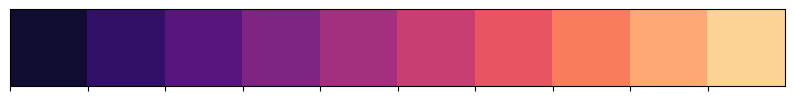

In [174]:
# Extend the 'warm' palette to have 12 colors
custom_palette = sns.color_palette("magma", 10)

# Use the extended palette in a plot as an example
sns.set_palette(custom_palette)

# Example plot to demonstrate the extended palette
sns.palplot(custom_palette)
plt.show()

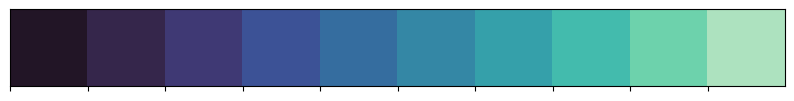

In [175]:
# Extend the 'warm' palette to have 12 colors
custom_palette_2 = sns.color_palette("mako", 10)

# Use the extended palette in a plot as an example
sns.set_palette(custom_palette_2)

# Example plot to demonstrate the extended palette
sns.palplot(custom_palette_2)
plt.show()

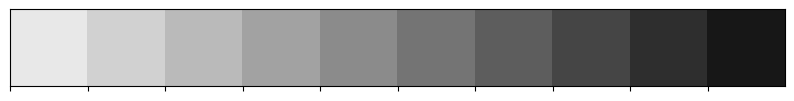

In [176]:
# Extend the 'warm' palette to have 12 colors
custom_palette_3 = sns.color_palette("binary", 10)

# Use the extended palette in a plot as an example
sns.set_palette(custom_palette_3)

# Example plot to demonstrate the extended palette
sns.palplot(custom_palette_3)
plt.show()

### **General Details about the Game of Thrones Series**

In [177]:
total_seasons = df['Season'].max()
total_episodes = len(df)
show_start = df['Original Air Date'].dt.date.min()
show_end = df['Original Air Date'].dt.date.max()

print(f'The total number of seasons: {total_seasons}')
print(f'The total number of episodes: {total_episodes}')
print(f'The first episode aired on {show_start} and last aired on {show_end}.')

The total number of seasons: 8
The total number of episodes: 73
The first episode aired on 2011-04-17 and last aired on 2019-05-19.


### **What was the distribution of episode ratings for IMDb, Rotten Tomatoes, and Metacritic?**

In [178]:
rating_cols = ['IMDb Rating', 'Rotten Tomatoes Rating (Percentage)', 'Metacritic Ratings']

df[rating_cols].describe()

,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings
count,73.000000,73.000000,73.000000
mean,8.741096,91.972603,7.817808
std,0.932565,11.499967,1.684186
min,4.000000,47.000000,2.600000
25%,8.500000,89.000000,6.500000
50%,8.800000,96.000000,8.500000
75%,9.300000,100.000000,9.100000
max,9.900000,100.000000,9.700000


**Ratings Distribution Analysis**

Overall, the "Game of Thrones" (GOT) series has received high praise across different rating platforms, though each platform's rating system provides a unique perspective on the show's reception.

**IMDb** is great for seeing what general audiences think of a tv show and anyone can leave a rating. Fans often skew the vote with 10-star ratings, which may result in inflated scores. General audiences on average give GOT an 8.74 out of 10 stars. The lowest episode rating was 4.00 and the higest was 9.90 stars. Fifty percent of episodes have an IMBd rating of 8.80 or higher. 

**Rotten Tomatoes** offers an overall picture of whether a show is worth seeing at a glance. Rotten Tomatoes only includes the opinions of top critics in the film industry. Critics either rate the show as "Fresh" or "Rotten", which can oversimplify the often complex opinions of critics. On average, 91% of top critics rated GOT as "Fresh". The least favored episode only received a "Fresh" rating from 47% of top critics. Several episodes received a "Fresh" rating from 100% of top critics. Seventy-five percent of episodes have a "Fresh" rating from 89% or more critics, with twenty-five percent of episodes receiving a "Fresh" rating from 100% of critics. 

**Metacritic** provides a composite score from multiple critical sources, ranging from 0 to 10 The average GOT Metacric rating was 7.82, where aggregate reviews consider GOT generally favorable. The lowest Metracritic score was 2.60 and the highest was 9.70. Fifty percent of episodes have a Metacritic rating of 9.10 or higher. 

The differences in these platforms' scoring systems underscore the complexity of measuring a show's success and the various factors that influence both audience and critical reception. Visualizing these distributions and exploring correlations with key show events, seasonality, and episode content could provide further insights into what drives viewer and critic preferences.



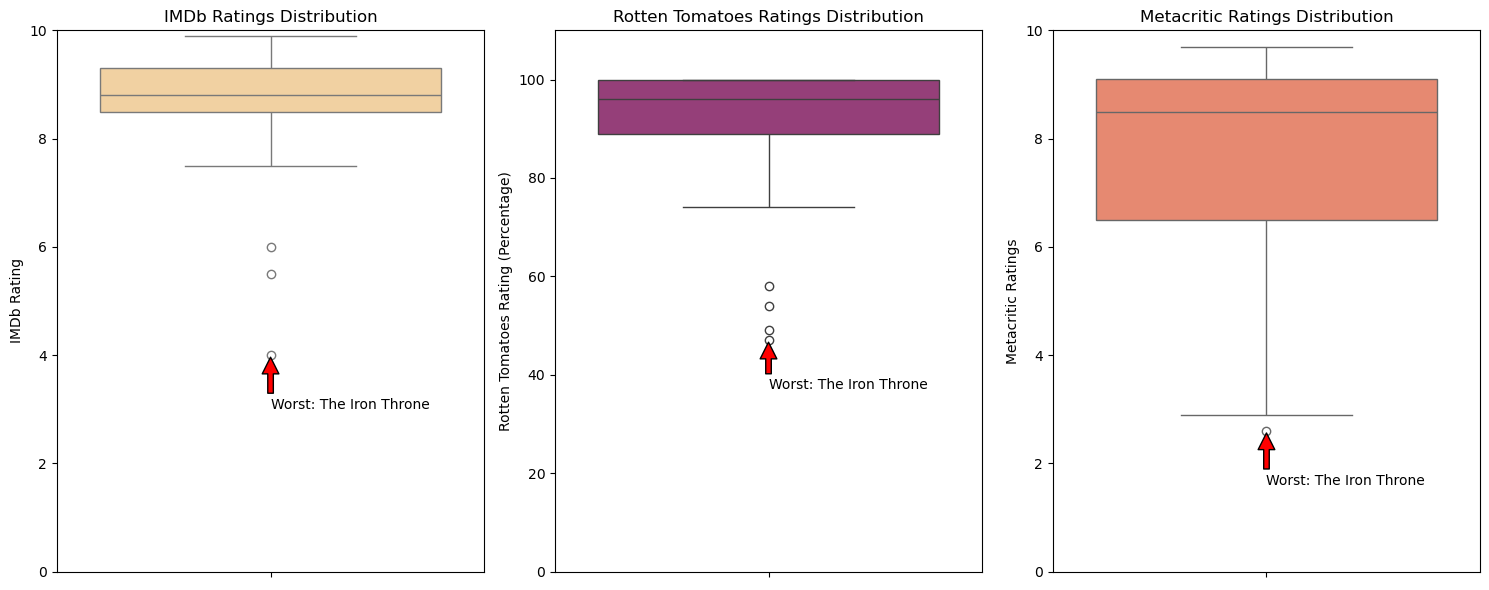

In [179]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Boxplot for IMDb Ratings
sns.boxplot(y=df['IMDb Rating'], ax=axes[0], color=custom_palette[9])
axes[0].set_title('IMDb Ratings Distribution')
axes[0].set_ylim(0, 10)

# Annotate worst episode
lowest_imdb_rating = df['IMDb Rating'].min()
lowest_imdb_episode = df[df['IMDb Rating'] == lowest_imdb_rating]['Title of the Episode'].values[0]
axes[0].annotate(f'Worst: {lowest_imdb_episode}', 
                 xy=(0, lowest_imdb_rating), 
                 xytext=(0, lowest_imdb_rating - 1),
                 arrowprops=dict(facecolor='red', shrink=0.05))

# Boxplot for Rotten Tomatoes Rating (Percentage)
sns.boxplot(y=df['Rotten Tomatoes Rating (Percentage)'], ax=axes[1], color=custom_palette[4])
axes[1].set_title('Rotten Tomatoes Ratings Distribution')
axes[1].set_ylim(0, 110)

# Annotate worst episode
lowest_rt_rating = df['Rotten Tomatoes Rating (Percentage)'].min()
lowest_rt_episode = df[df['Rotten Tomatoes Rating (Percentage)'] == lowest_rt_rating]['Title of the Episode'].values[0]
axes[1].annotate(f'Worst: {lowest_rt_episode}', 
                 xy=(0, lowest_rt_rating), 
                 xytext=(0, lowest_rt_rating - 10),
                 arrowprops=dict(facecolor='red', shrink=0.05))

# Boxplot for Metacritic Ratings
sns.boxplot(y=df['Metacritic Ratings'], ax=axes[2], color=custom_palette[7])
axes[2].set_title('Metacritic Ratings Distribution')
axes[2].set_ylim(0, 10) 

# Annotate worst episode
lowest_metacritic_rating = df['Metacritic Ratings'].min()
lowest_metacritic_episode = df[df['Metacritic Ratings'] == lowest_metacritic_rating]['Title of the Episode'].values[0]
axes[2].annotate(f'Worst: {lowest_metacritic_episode}', 
                 xy=(0, lowest_metacritic_rating), 
                 xytext=(0, lowest_metacritic_rating - 1),
                 arrowprops=dict(facecolor='red', shrink=0.05))

plt.tight_layout()
plt.show()

Metacritic ratings show the widest distribution. This is likely because it includes ratings from critics only instead of a higher nubmer of fans like IMDb includes. Also, Metacritic allows for a range of review scores from 0 to 10, unlike Rotten Tomatoes' binary vote of Fresh/Rotten. 

It's interesting to note that "The Iron Throne" is the lowest-rated episode across all platforms, indicating a strong consensus among viewers and critics regarding this episode.

## **How did Metacritic ratings change over time?**

In [180]:
df['Original Air Date'].head()

0   2011-04-17
1   2011-04-24
2   2011-05-01
3   2011-05-08
4   2011-05-15
Name: Original Air Date, dtype: datetime64[ns]

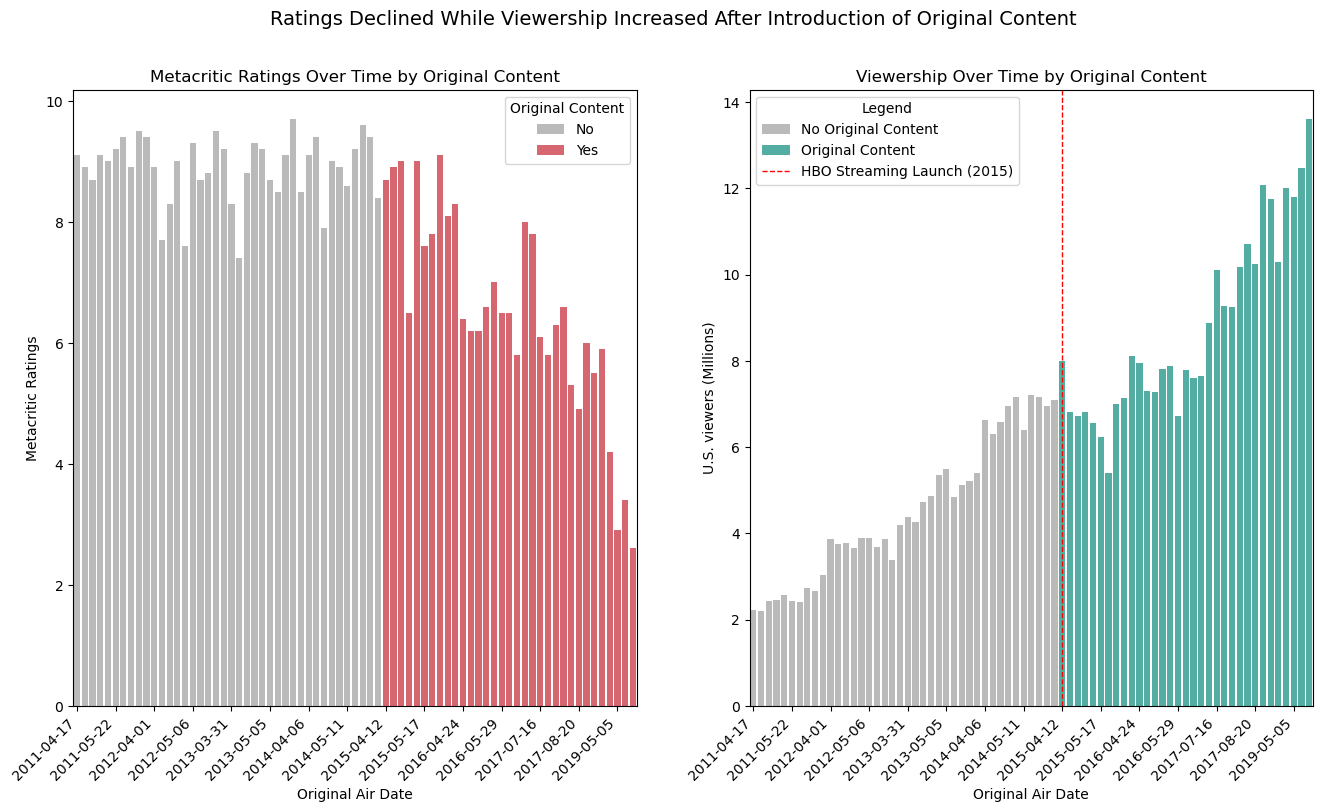

In [181]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
custom_colors_1 = [custom_palette_3[2], custom_palette_2[7]]
custom_colors_2 = [custom_palette_3[2], custom_palette[6]]

# Plot 1: Metacritic Ratings Over Time
sns.barplot(x=df['Original Air Date'], y=df['Metacritic Ratings'], hue=df['Original Content'], palette=custom_colors_2, ax=ax[0])
ax[0].set_title('Metacritic Ratings Over Time by Original Content')

ax[0].set_xlabel('Original Air Date')
ax[0].set_ylabel('Metacritic Ratings')

# Set x-ticks as dates
x_dates = df['Original Air Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax[0].set_xticks(x_dates[::5])
ax[0].set_xticklabels(labels=x_dates[::5], rotation=45, ha='right')

# Set legend labels
legend_labels = ['No', 'Yes']
handles, _ = ax[0].get_legend_handles_labels()
ax[0].legend(handles, legend_labels, title='Original Content')

# Plot 2: US Viewers Over Time
sns.barplot(x=df['Original Air Date'], y=df['U.S. Viewers (Millions)'], hue=df['Original Content'], palette=custom_colors_1, ax=ax[1])
ax[1].set_title('Viewership Over Time by Original Content')
ax[1].set_xlabel('Original Air Date')
ax[1].set_ylabel('U.S. viewers (Millions)')

# Set x-ticks as dates
x_dates = df['Original Air Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax[1].set_xticks(x_dates[::5])
ax[1].set_xticklabels(labels=x_dates[::5], rotation=45, ha='right')

# Define the HBO streaming launch date as a string to match x-axis format
hbo_launch_date_str = pd.to_datetime('2015-04-12').strftime('%Y-%m-%d')

# Add vertical line at the specific date
ax[1].axvline(hbo_launch_date_str, color='red', linestyle='--', linewidth=1, label='HBO Streaming Launch (2015)')

legend_labels = ['No Original Content', 'Original Content', 'HBO Streaming Launch (2015)']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, legend_labels, title='Legend')

fig.suptitle('Ratings Declined While Viewership Increased After Introduction of Original Content', fontsize=14);



In [182]:
df.groupby('Original Content')[rating_cols].mean()

,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings
Original Content,,,
0,8.985000,96.125000,8.880000
1,8.445455,86.939394,6.530303


In [183]:
df.groupby('Completed Novel')[rating_cols].mean()

,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings
Completed Novel,,,
0,8.330435,85.826087,5.76087
1,8.930000,94.800000,8.76400


The average Metacritic rating went from an 8.88 before GOT writers introduced original content down to a 6.53 average rating after introducing original content in 2015. IMDb and Rotten Tomatoes ratings also showed a decrease, but not as large as the Metacritic ratings decrease. There are similar differences when looking at whether seasons were based off of completed novels or the outline of novels. GOT fans are still waiting for George R.R. Martin to finish writing the 6th and 7th novels in the series.

Although the increase in viewership cannot necessarily be attributed to the introduction of new content in 2015, the total U.S. viewers increased from about 8 million in 2015 to nearly 14 million by the end of the show in 2019. In 2015, HBO launched thier on demand streaming service, resulting in access to their shows for much more people and could be correlated with the increased GOT viewership. This divergence suggests that while the show's creative direction may have been divisive among critics, its popularity and accessibility continued to draw in new viewers.

In [184]:
df.columns

Index(['Season', 'No. of Episode (Season)', 'No. of Episode (Overall)',
       'Title of the Episode', 'Running Time (Minutes)', 'Directed by',
       'Written by', 'Original Air Date', 'U.S. Viewers (Millions)',
       'Cinematography by', 'Editing by', 'IMDb Rating',
       'Rotten Tomatoes Rating (Percentage)', 'Metacritic Ratings',
       'Filming Duration (Months)', 'Novel(s) Adapted', 'Synopsis',
       'Air Month', 'Air Day', 'Air Year', 'Completed Novel',
       'Original Content'],
      dtype='object')

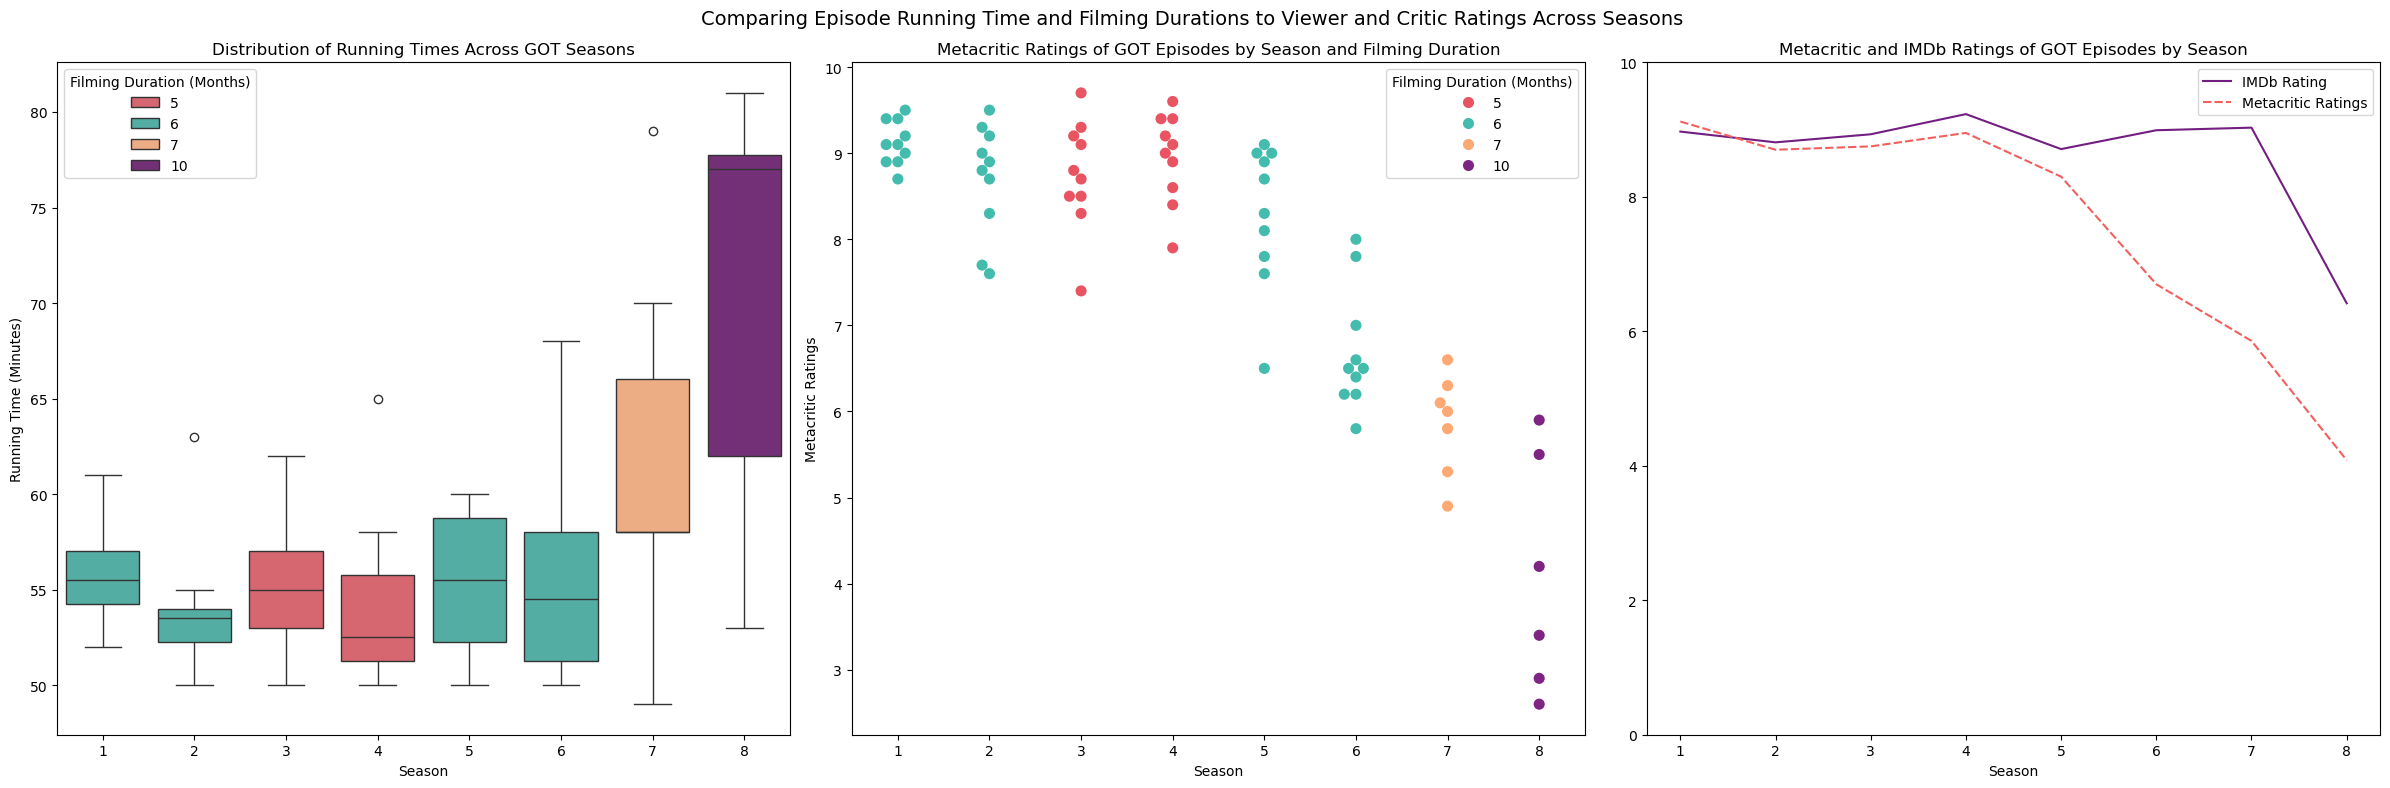

In [185]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,8))

fig.suptitle('Comparing Episode Running Time and Filming Durations to Viewer and Critic Ratings Across Seasons ', fontsize=14)

# Create a mapping from 'Filming Duration (Months)' to colors
filming_duration_colors = {
    5: custom_palette[6],
    6: custom_palette_2[7],
    7: custom_palette[8],
    10: custom_palette[3]
}

# Plot 1: Boxplot of Running Time by Season
sns.boxplot(x='Season', y='Running Time (Minutes)', data=df, hue='Filming Duration (Months)', palette=filming_duration_colors, ax=ax[0])
ax[0].set_title('Distribution of Running Times Across GOT Seasons')

# Plot 2: Swarmplot of Metacritic Ratings with custom colors
sns.swarmplot(
    x='Season', 
    y='Metacritic Ratings', 
    hue='Filming Duration (Months)', 
    data=df, 
    palette=filming_duration_colors, 
    ax=ax[1],
    size=8
)
ax[1].set_title('Metacritic Ratings of GOT Episodes by Season and Filming Duration')


sns.lineplot(df.groupby('Season')[['IMDb Rating', 'Metacritic Ratings']].mean(), palette='magma', ax=ax[2])
ax[2].set_title('Metacritic and IMDb Ratings of GOT Episodes by Season')
ax[2].set_ylim(0, 10)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()



In [186]:
df[df['IMDb Rating'] == df['IMDb Rating'].max()][['Title of the Episode', 'No. of Episode (Overall)','Running Time (Minutes)', 'IMDb Rating']]

,Title of the Episode,No. of Episode (Overall),Running Time (Minutes),IMDb Rating
28,The Rains of Castamere,29,50,9.9
58,Battle of the Bastards,59,59,9.9
59,The Winds of Winter,60,68,9.9


In [187]:
df[df['Metacritic Ratings'] == df['Metacritic Ratings'].max()][['Title of the Episode', 'No. of Episode (Overall)', 'Running Time (Minutes)', 'Metacritic Ratings']]

,Title of the Episode,No. of Episode (Overall),Running Time (Minutes),Metacritic Ratings
28,The Rains of Castamere,29,50,9.7


**Top Rated Episodes**: Both critics and the GOT audience shared in common their top rated episode, "The Rains of Castamere" which was 50 minutes long. GOT viewers also had 2 other ties for most highly rated episode, "Battle of the Bastards" (59 minutes) and "The Winds of Winter" (68 minutes). 

**Episode Running Time Trends**: The boxplot reveals that the average running time of "Game of Thrones" episodes generally increased as the series progressed. Notably, Season 8 episodes exhibit the longest durations, with several episodes surpassing 70 minutes. This increase in episode length suggests a strategic shift toward longer, more in-depth storytelling as the series approached its conclusion.

**Metacritic Ratings and Filming Duration**: The swarmplot demonstrates that Metacritic Ratings varied widely across seasons and filming duration. Episodes with shorter filming durations (5-6 months) tend to cluster around higher Metacritic ratings, particularly in earlier seasons. In contrast, episodes with longer filming durations (10 months) in later seasons tend to have more variable and generally lower ratings. This indicates that despite more extended production efforts, later episodes were not universally well-received by critics.

A clear pattern emerges in how filming duration correlates with Metacritic ratings. Episodes with medium-length filming (5-6 months) still maintained relatively high ratings, but those with the longest filming durations (10 months) showed significant drops in Metacritic scores, particularly in the final seasons. This suggests diminishing returns on critical reception despite increased production time.

**Metacritic Ratings Compared to IMDb Ratings**: Although critics and the general GOT audience showed decreased ratings performance over time, critics started showing a decrease in average ratings initially with season 5 and continued to decrease sharply over the following 3 seasons. The general GOT audience ratings remained relatively stable through season 7 and showed a sharp decline for season 8.

**Implications**: The decline in Metacritic ratings for episodes with longer filming durations could imply that extending production time does not necessarily improve a show's quality or audience reception. Future productions might benefit from optimizing filming schedules and focusing on content quality rather than length. Additionally, increased episode unning times resulting from extended fimling processes did not produce a positive impact amongst GOT critics. GOT fans did not seem to have a significant decrease in ratings until the 8th season, possibly reflecting disappointment with the shorter season, longer episodes, and overall narrative. 

**Recommendations**: For future series, especially finales or significant episodes, consider balancing narrative depth with optimal episode length to maintain engagement without overextending production.


# NLP and Clustering

In [188]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [189]:
# Download the 'stopwords' corpus
nltk.download('stopwords')

# Download the 'wordnet' corpus for lemmatization
nltk.download('wordnet')

# Download 'punkt' tokenizer models if needed
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /Users/katialopes-
[nltk_data]     gilbert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/katialopes-
[nltk_data]     gilbert/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/katialopes-
[nltk_data]     gilbert/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [190]:
def preprocess_text(text):

    # convert all text to lowercase
    text = text.lower()

    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # tokenize text
    words = word_tokenize(text)

    # remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # join words back to single string
    return ' '.join(words)

In [191]:
df['Synopsis_Clean'] = df['Synopsis'].apply(preprocess_text)

In [192]:
df[['Synopsis_Clean']].head()

,Synopsis_Clean
0,north seven kingdom westeros night watch soldi...
1,ned new hand king travel king landing accompan...
2,ned attends king small council learns westeros...
3,returning king landing tyrion stop winterfell ...
4,king robert eunuch spy varys uncovered daenery...


In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [194]:
tfidf_vectorizer = TfidfVectorizer(max_features=500)

tfidf_matrix = tfidf_vectorizer.fit_transform(df['Synopsis_Clean'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [195]:
tfidf_df.shape

(73, 500)

In [196]:
tfidf_columns = tfidf_df.columns.to_list()

In [197]:
merged_df = pd.merge(df, tfidf_df, left_index=True, right_index=True)

In [198]:
tfidf_season_sum = merged_df.groupby('Season')[tfidf_columns].sum()

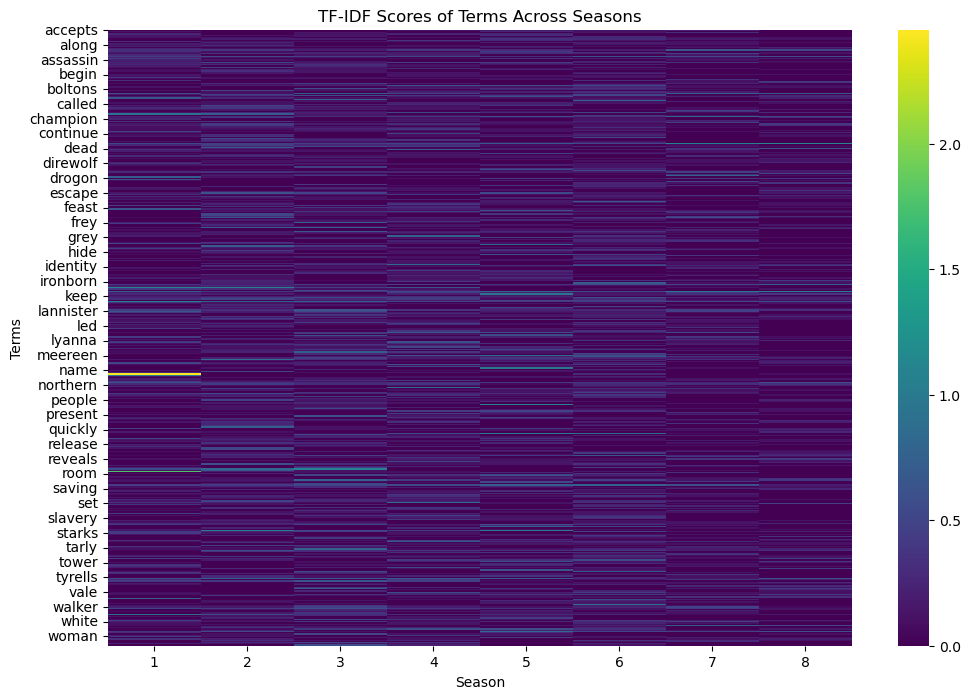

In [199]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_season_sum.T, cmap='viridis')
plt.title('TF-IDF Scores of Terms Across Seasons')
plt.xlabel('Season')
plt.ylabel('Terms')
plt.show()

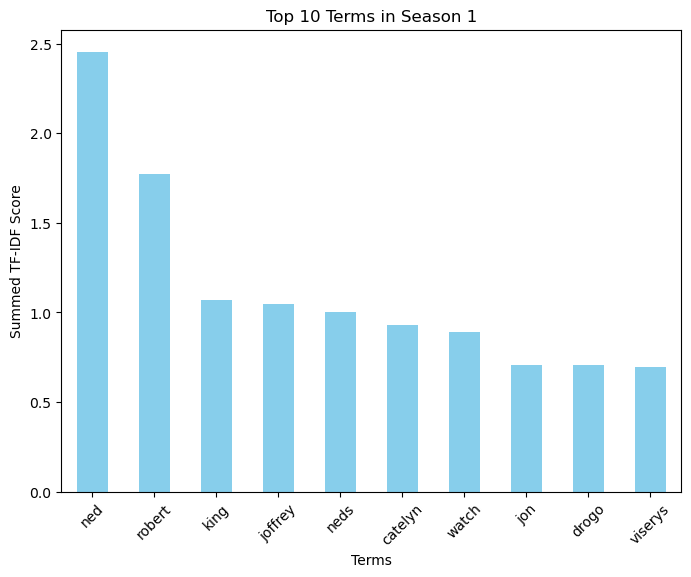

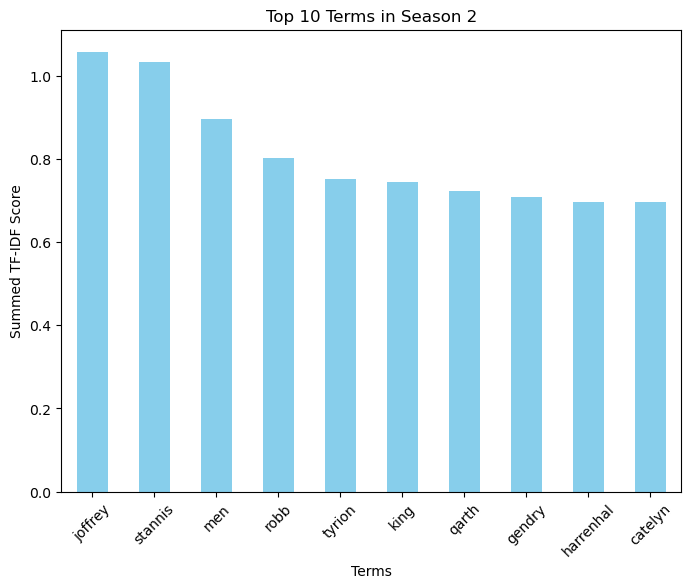

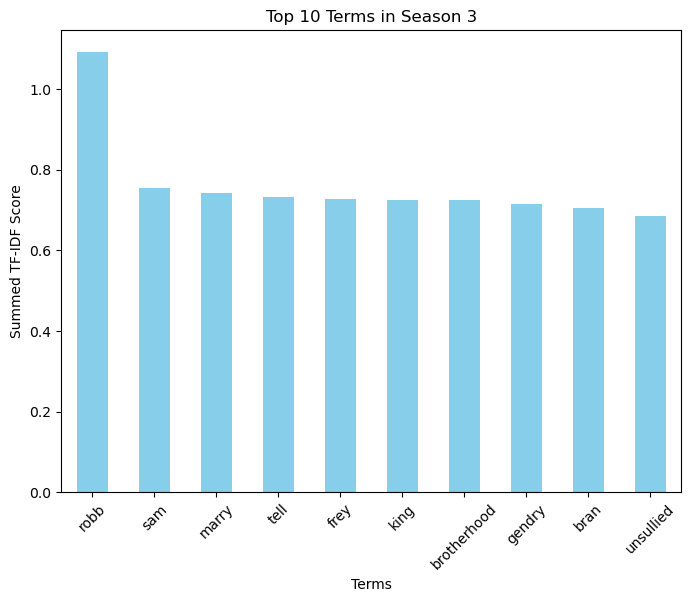

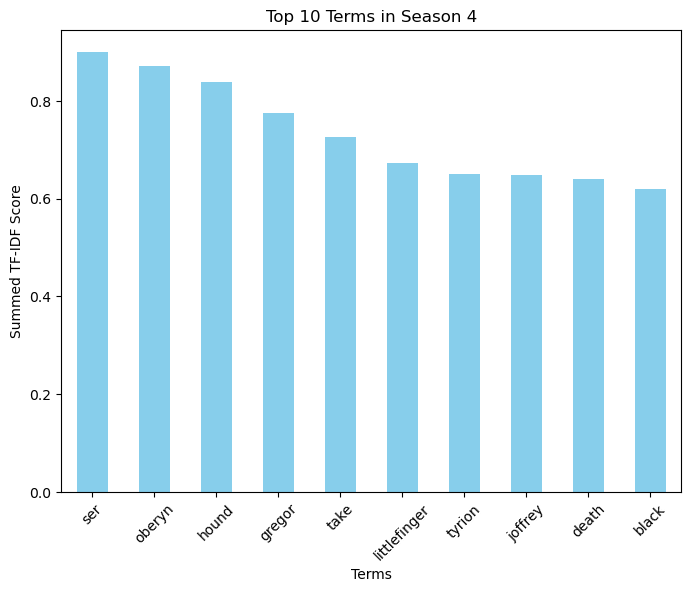

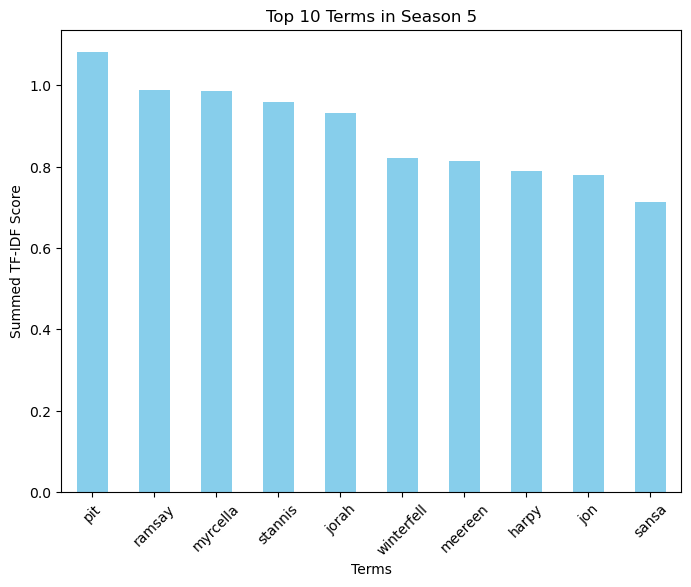

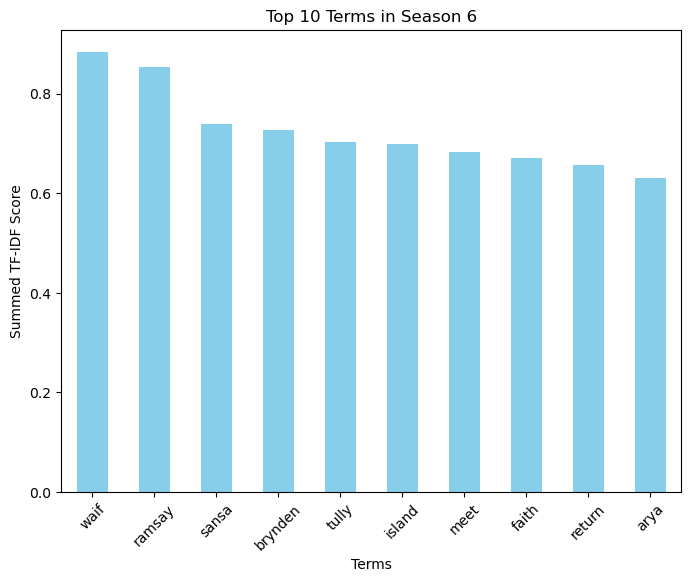

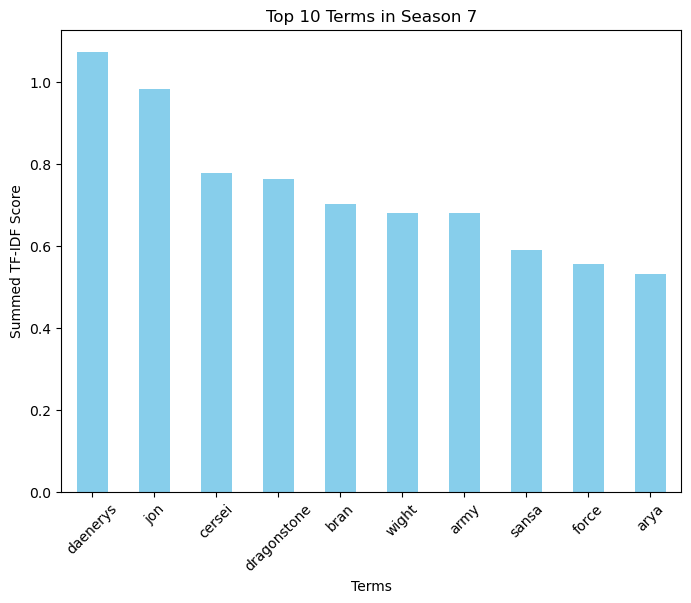

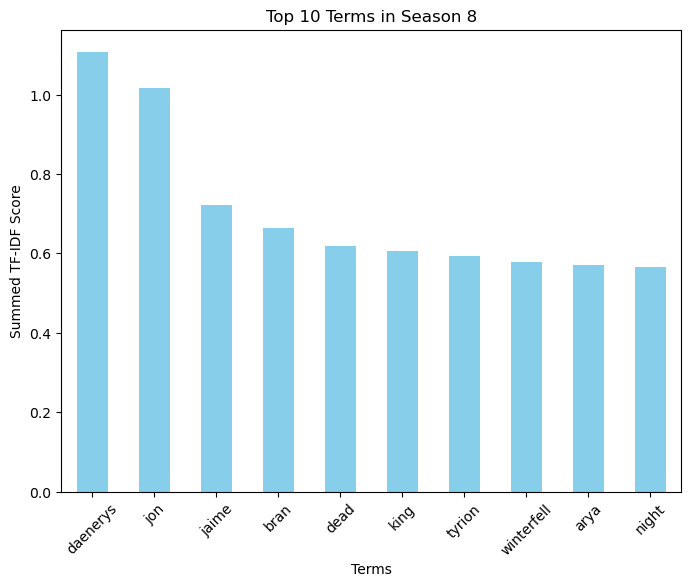

In [200]:
# Define the number of top terms you want to plot
top_n = 10

# Plotting top terms for each season
for season in tfidf_season_sum.index:
    top_terms = tfidf_season_sum.loc[season].sort_values(ascending=False).head(top_n)
    
    plt.figure(figsize=(8, 6))
    top_terms.plot(kind='bar', color='skyblue')
    plt.title(f'Top {top_n} Terms in Season {season}')
    plt.xlabel('Terms')
    plt.ylabel('Summed TF-IDF Score')
    plt.xticks(rotation=45)
    plt.show()

In [201]:
sns.set_palette('tab20', 12)


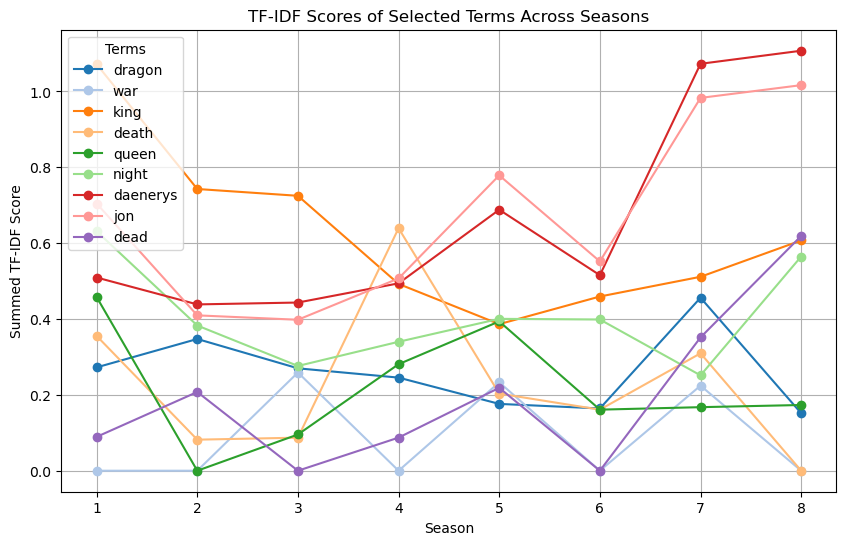

In [202]:
import matplotlib.pyplot as plt

# Select a few terms to track over seasons
selected_terms = ['dragon', 'war', 'king', 'death', 'queen', 'night', 'daenerys', 'jon', 'dead']

# Plot TF-IDF scores for selected terms across seasons
plt.figure(figsize=(10, 6))

for term in selected_terms:
    plt.plot(tfidf_season_sum.index, tfidf_season_sum[term], label=term, marker='o')

plt.title('TF-IDF Scores of Selected Terms Across Seasons')
plt.xlabel('Season')
plt.ylabel('Summed TF-IDF Score')
plt.legend(title='Terms')
plt.grid(True)
plt.show()


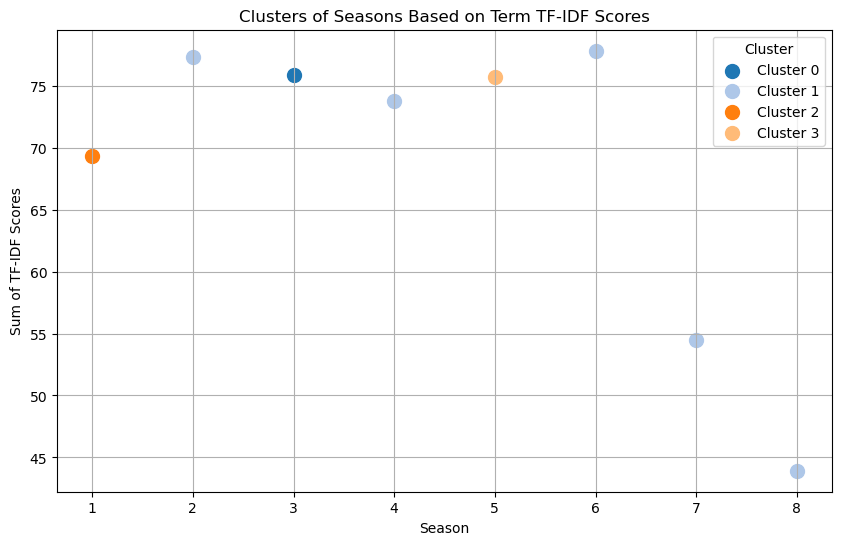

In [208]:
from sklearn.cluster import KMeans
import numpy as np

# Perform KMeans clustering on TF-IDF scores
num_clusters = 4  # Define number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_season_sum)

# Add cluster labels to the DataFrame
tfidf_season_sum['Cluster'] = clusters

# Plotting clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = tfidf_season_sum[tfidf_season_sum['Cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data.sum(axis=1), label=f'Cluster {cluster}', s=100)

plt.title('Clusters of Seasons Based on Term TF-IDF Scores')
plt.xlabel('Season')
plt.ylabel('Sum of TF-IDF Scores')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [213]:
df_1 = pd.merge(df[['Season', 'Running Time (Minutes)']], tfidf_df, left_index=True, right_index=True)
df_1.head()

,Season,Running Time (Minutes),accepts,accompanies,advice,aemon,agrees,aid,alive,alliance,alliser,allow,allows,ally,along,also,ambush,appoints,army,arrest,arrive,arrives,arryn,arya,aryas,asks,assassin,assassinate,attack,attacked,attempt,attend,balon,bank,baratheon,bastard,battle,bay,begin,begs,behind,belief,bend,benjen,beric,beyond,birth,black,body,bolton,boltons,boy,braavos,bran,brandon,brienne,bronn,brother,brotherhood,brynden,burn,burning,called,camp,captive,capture,captured,capturing,casterly,castle,catelyn,cave,cersei,cerseis,champion,charge,child,citadel,city,claim,claiming,clegane,combat,command,commander,confronts,continue,convinces,council,crane,craster,crasters,crown,daario,daenerys,daughter,davos,daxos,dead,death,debt,decline,defeat,defense,demand,depart,despite,destroying,destroys,die,direwolf,discovers,disguised,dondarrion,doran,dorne,dothraki,dragon,dragonfire,dragonglass,dragonstone,drogo,drogon,drogos,dy,eastwatch,edd,edmure,ellaria,en,encounter,end,enraged,enter,escape,essos,euron,exchange,executes,eyrie,face,faith,family,fatally,father,fear,feast,fight,fighting,find,fire,first,fist,fleet,force,forest,former,free,frey,friend,gain,gate,gendry,ghost,gift,gilly,give,go,gold,gregor,grey,greyjoy,greyscale,group,guard,hand,harpy,harrenhal,head,heir,help,hghar,hide,hiding,high,highgarden,hodor,home,horde,horse,hostage,hot,hound,house,identity,ignoring,impending,including,informs,inn,inside,instead,intending,intends,intervenes,iron,ironborn,island,jaime,jaimes,jeor,joffrey,join,jojen,jon,jons,jorah,jorahs,keep,kill,killed,killing,king,kingdom,knight,knowing,lady,lancel,land,landing,lannister,lannisters,last,later,lead,leader,leading,leaf,learning,learns,leave,leaving,led,letter,life,light,little,littlefinger,locke,loraq,loras,lord,lover,loyalty,lyanna,lysa,maester,make,man,mance,many,margaery,marriage,marry,master,meera,meereen,meet,melisandre,men,message,missandei,mormont,murder,must,mutineer,myrcella,naharis,name,named,nearby,ned,neds,needle,negotiate,never,new,news,night,north,northern,nymeria,oberyn,offer,old,oldtown,olenna,one,order,osha,others,pay,people,persuade,persuades,pie,pit,place,plan,pledge,plot,podrick,poison,poisoned,present,prevent,prince,prisoner,promise,proposes,protect,prove,pycelle,pyke,qarth,queen,quickly,qyburn,rally,ramsay,ransom,raven,rayder,recruit,red,refuse,reject,relationship,release,remain,remains,renly,renlys,request,rescue,retake,retreat,return,reunited,revealed,reveals,revenge,reward,rhaegal,rickon,ride,riverlands,riverrun,robb,robbs,robert,rock,room,roose,rule,sacrifice,sail,sam,samwell,sand,sandor,sansa,sansas,save,saving,say,sea,secret,secretly,secure,seek,seeking,selyse,send,sends,ser,set,seven,several,shae,ship,shireen,show,siege,sister,slaughter,slave,slaver,slavery,slynt,small,snow,soldier,son,south,sparrow,spying,stab,stannis,stark,starks,steel,support,surrender,surviving,survivor,sword,take,taken,taking,talisa,targaryen,tarly,tell,theon,theons,thorne,thoros,threatens,three,threeeyed,throne,tommen,tormund,tower,train,travel,treason,trial,true,trystane,tully,twin,two,tyene,tyrell,tyrells,tyrion,tyrions,tywin,umber,unable,uncle,undead,unknown,unsullied,upon,using,vale,valyrian,varys,victory,viserion,viserys,vision,visit,volantis,vow,waif,walder,walker,wall,want,war,warden,warns,watch,watchman,way,wed,wedding,westeros,white,whose,wife,wight,wildfire,wildling,wildlings,win,winterfell,witch,without,witness,woman,worm,wounded,yara,yaras,ygritte,young,yunkai
0,1,61,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.04752,0.000000,0.00000,0.0,0.291389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084774,0.000000,0.000000,0.0,0.0,0.081677,0.102996,0.0,0.0,0.0,0.0,0.000000,0.092337,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052795,0.074114,0.0,0.0,0.068248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.070062,0.0,0.0,0.053787,0.133102,0.0,0.039957,0.072010,0.0,0.0,0.000000,0.0,0.0,0.0,0.09713,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0

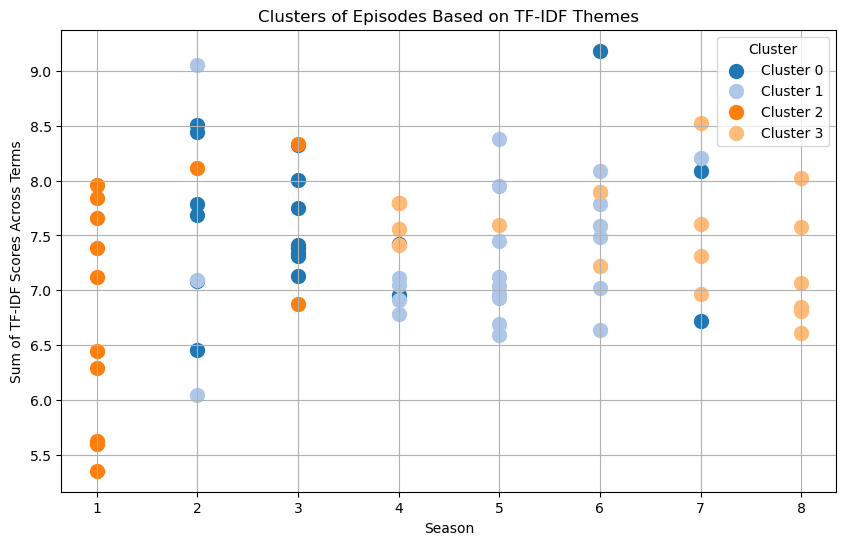

In [229]:
# Merge the relevant columns for clustering
df_1 = pd.merge(df[['Season']], tfidf_df, left_index=True, right_index=True)

# Perform KMeans clustering on the combined DataFrame
num_clusters = 4  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(df_1.drop(columns=['Season']))  # Drop 'Season' for clustering

# Add cluster labels to the DataFrame
df_1['Cluster'] = clusters

# Set the color palette
sns.set_palette('tab20')

# Plotting clusters
plt.figure(figsize=(10, 6))

# Scatter plot using Season and Running Time as axes
for cluster in range(num_clusters):
    cluster_data = df_1[df_1['Cluster'] == cluster]
    plt.scatter(cluster_data['Season'], cluster_data.drop(columns=['Season', 'Cluster']).sum(axis=1), label=f'Cluster {cluster}', s=100)

plt.title('Clusters of Episodes Based on TF-IDF Themes')
plt.xlabel('Season')
plt.ylabel('Sum of TF-IDF Scores Across Terms')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [230]:
# Calculate top words for each cluster
for cluster_num in range(num_clusters):
    cluster_df = df_1[df_1['Cluster'] == cluster_num]  # Filter episodes for each cluster
    cluster_sum = cluster_df.drop(columns=['Season', 'Cluster']).sum(axis=0)  # Sum TF-IDF scores
    top_words = cluster_sum.sort_values(ascending=False).head(10)  # Get top 10 words
    print(f"Cluster {cluster_num}: Top Words")
    print(top_words)
    print("\n")


Cluster 0: Top Words
tyrion      1.596698
king        1.566088
stannis     1.488183
joffrey     1.449511
robb        1.322766
gendry      1.172187
daenerys    1.148599
frey        1.139001
davos       1.100556
sansa       1.088399
dtype: float64


Cluster 1: Top Words
ramsay          2.017092
sansa           1.977194
jon             1.743500
winterfell      1.722437
daenerys        1.383424
littlefinger    1.369852
black           1.329369
meereen         1.254001
theon           1.215759
cersei          1.197773
dtype: float64


Cluster 2: Top Words
ned        2.454449
robert     1.774626
joffrey    1.268588
king       1.241423
watch      1.179402
catelyn    1.022587
neds       1.001675
jon        0.961575
bran       0.890558
brother    0.843654
dtype: float64


Cluster 3: Top Words
daenerys    2.106629
jon         1.704688
bran        1.684001
arya        1.511018
jaime       1.404583
drogon      1.225642
king        1.177443
cersei      0.997739
wight       0.978913
army        0.97

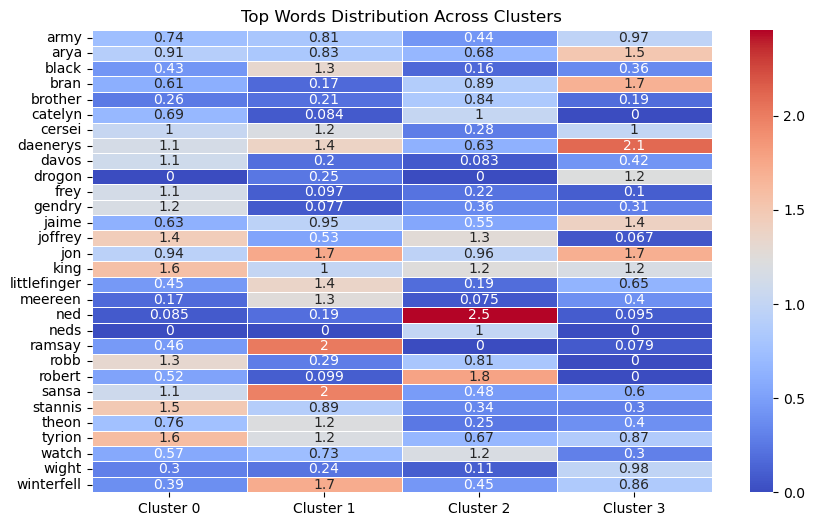

In [239]:
# Prepare data for heatmap
top_words_overall = set()
for cluster_num in range(num_clusters):
    cluster_df = df_1[df_1['Cluster'] == cluster_num]
    cluster_sum = cluster_df.drop(columns=['Season', 'Cluster']).sum(axis=0)
    top_words = cluster_sum.sort_values(ascending=False).head(10).index
    top_words_overall.update(top_words)

# Convert the set to a sorted list for consistent ordering
top_words_overall = sorted(list(top_words_overall))

# Create a DataFrame with the top words as index
top_words_df = pd.DataFrame(index=top_words_overall)
for cluster_num in range(num_clusters):
    cluster_df = df_1[df_1['Cluster'] == cluster_num]
    cluster_sum = cluster_df.drop(columns=['Season', 'Cluster']).sum(axis=0)
    top_words_df[f'Cluster {cluster_num}'] = cluster_sum[top_words_overall]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(top_words_df.fillna(0), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Top Words Distribution Across Clusters')
plt.show()


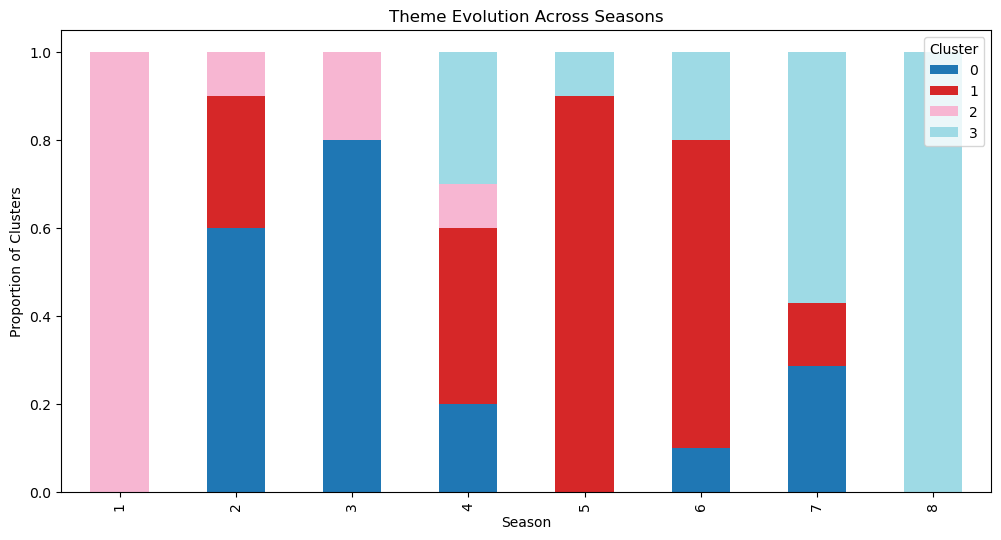

In [236]:
# Calculate cluster distribution by season
cluster_distribution = df_1.groupby(['Season', 'Cluster']).size().unstack(fill_value=0)
cluster_distribution = cluster_distribution.div(cluster_distribution.sum(axis=1), axis=0)

# Plot stacked bar chart
cluster_distribution.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 6))
plt.title('Theme Evolution Across Seasons')
plt.xlabel('Season')
plt.ylabel('Proportion of Clusters')
plt.legend(title='Cluster')
plt.show()
